In [45]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd

#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

## Attention..Logic lies here..
This is the logic..
Be careful about columnwise, these calculate all column values and shows..
On the other hand, others are row wise!..shows row by row..!!

Pandas tries to be pragmatic about plotting DataFrames or Series that contain missing data. Missing values are dropped, left out, or filled depending on the plot type.

* Plot Type	NaN Handling
* Line	Leave gaps at NaNs
* Line (stacked)	Fill 0’s
* Bar	Fill 0’s
* Scatter	Drop NaNs
* Histogram	Drop NaNs (column-wise)
* Box	Drop NaNs (column-wise)
* Area	Fill 0’s
* KDE	Drop NaNs (column-wise)
* Hexbin	Drop NaNs
* Pie	Fill 0’s

If any of these defaults are not what you want, or if you want to be explicit about how missing values are handled, consider using fillna() or dropna() before plotting.

	You can also create these other plots using the methods DataFrame.plot.<kind> instead of providing the kindkeyword argument. This makes it easier to discover plot methods and the specific arguments they use:
	In [13]: df = pd.DataFrame()
	In [14]: df.plot.<TAB>
    df.plot.area     df.plot.barh     df.plot.density  df.plot.hist     df.plot.line     df.plot.scatter
    df.plot.bar      df.plot.box      df.plot.hexbin   df.plot.kde      df.plot.pie
	
    In addition to these kind s, there are the DataFrame.hist(), and DataFrame.boxplot() methods, which use a separate interface.
	Finally, there are several plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include
		• Scatter Matrix
		• Andrews Curves
		• Parallel Coordinates
		• Lag Plot
		• Autocorrelation Plot
		• Bootstrap Plot
		• RadViz



# Line both column-wise and row-wise

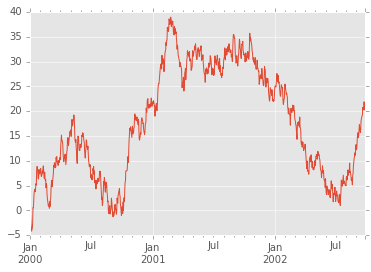

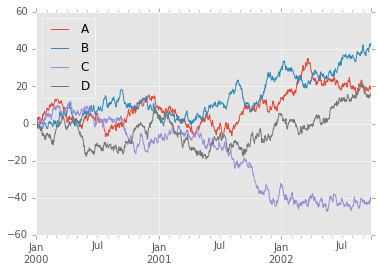

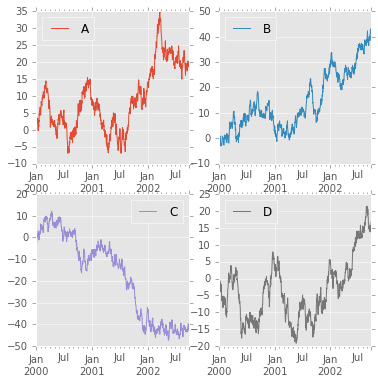

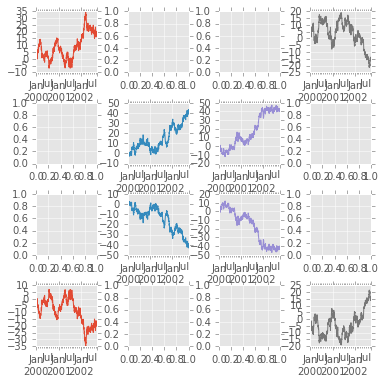

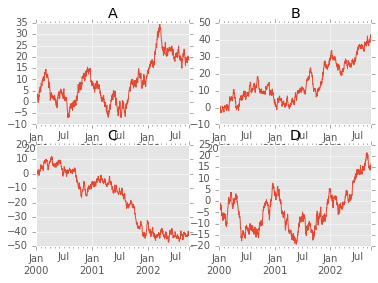

In [116]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); 
df.plot();
#--------
df.plot(subplots=True, layout=(2, 2), figsize=(6, 6), sharex=False);
#-------
fig, axes = plt.subplots(4, 4, figsize=(6, 6));
plt.subplots_adjust(wspace=0.5, hspace=0.5);
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)
#-------
fig, axes = plt.subplots(nrows=2, ncols=2)
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]); axes[0,1].set_title('B');
df['C'].plot(ax=axes[1,0]); axes[1,0].set_title('C');
df['D'].plot(ax=axes[1,1]); axes[1,1].set_title('D')

# Add table to line plot

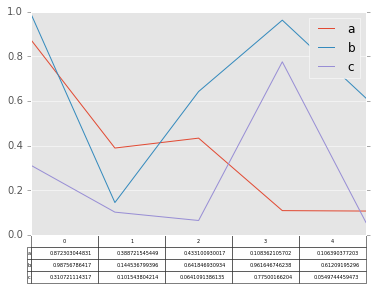

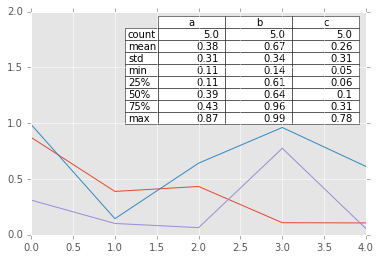

In [125]:
fig, ax = plt.subplots(1, 1)
df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])
ax.get_xaxis().set_visible(False)   # Hide Ticks
df.plot(table=True, ax=ax)
#-------
from pandas.tools.plotting import table
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2),
      loc='upper right', colWidths=[0.2, 0.2, 0.2])
df.plot(ax=ax, ylim=(0, 2), legend=None)

# Using matplotlib directly

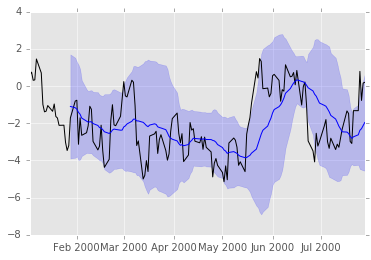

In [129]:
price = pd.Series(np.random.randn(150).cumsum(),
               index=pd.date_range('2000-1-1', periods=150, freq='B')) 
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

# Bar  row-wise

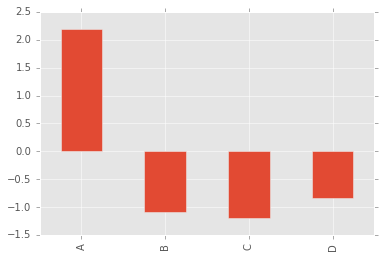

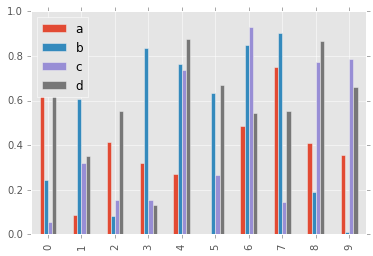

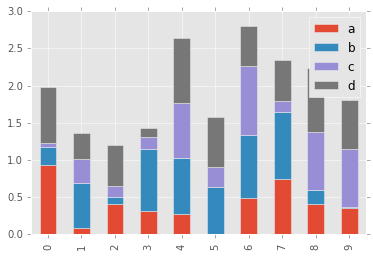

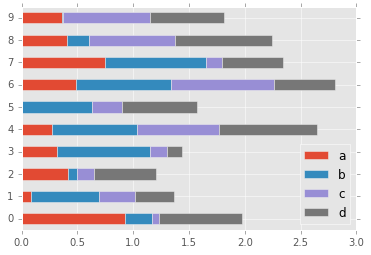

In [47]:
df.ix[5].plot.bar();
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar()
df2.plot.bar(stacked=True);
df2.plot.barh(stacked=True);

# Plotting with error bars

             data1  data2
letter word              
a      bar     3.5    6.0
       foo     2.5    5.5
b      bar     2.5    5.5
       foo     3.0    4.5
                data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107


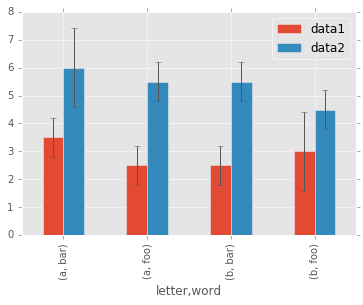

In [119]:
# Generate the data
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], names=['letter', 'word'])
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)
# Group by index labels and take the means and standard deviations for each group
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
errors = gp3.std()
print means
print errors
# Plot
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax)

# Histogram column-wise

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122f1ef50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11adc5b50>]], dtype=object)

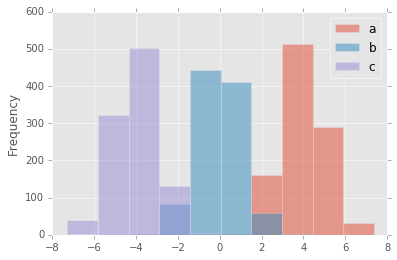

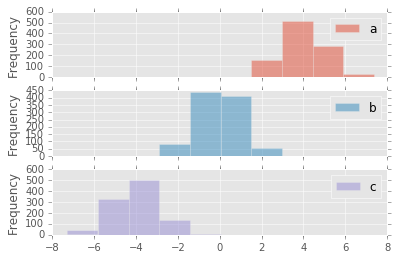

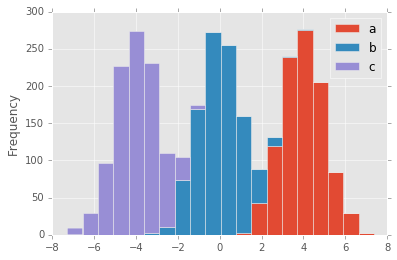

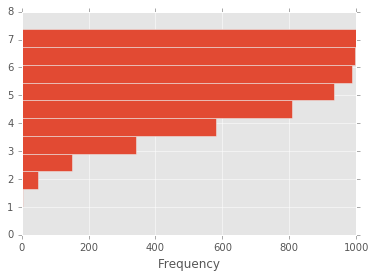

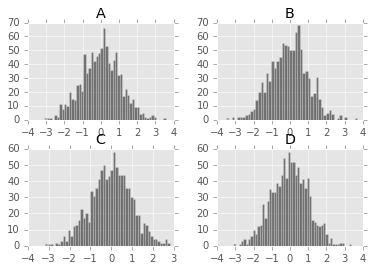

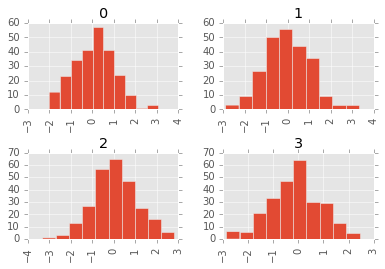

In [51]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 4, 'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 4}, columns=['a', 'b', 'c'])
df4.plot.hist(alpha=0.5)
#-------
#subplots to seperate graphics..
df4.plot.hist(alpha=0.5,subplots=True)
#-------
df4.plot.hist(stacked=True, bins=20)
plt.figure()
#--------
df4['a'].plot.hist(orientation='horizontal', cumulative=True)
#-------
#This is the existing api..
#If we want columns to appear on different layouts, this is the answer..existing api..
df.diff().hist(color='k', alpha=0.5, bins=50)
#--------
#by means groupby..
plt.figure()
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

# Boxplot Column-wise

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/anaconda/envs/py27/lib/python2.7/site-packages/pandas/tools/plotting.py:3079: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


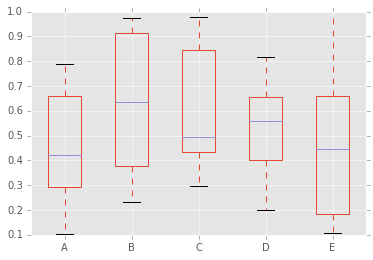

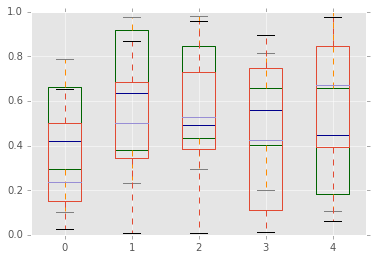

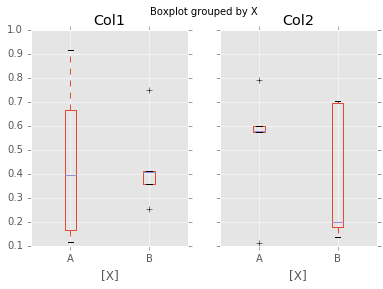

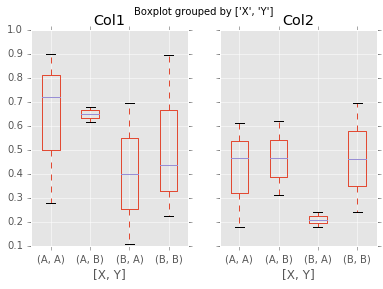

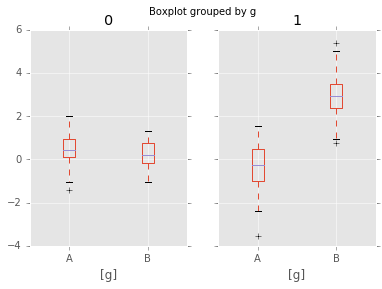

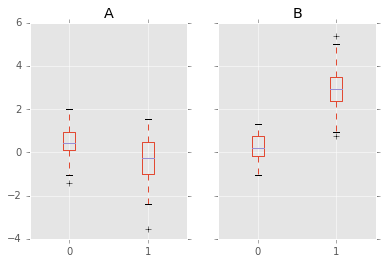

In [52]:
#Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), 
#or DataFrame.boxplot() to visualize the distribution of values within each column.
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
    medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

#Other api!!..
df = pd.DataFrame(np.random.rand(10,5))
bp = df.boxplot()

#Grouped boxplot, for every column, groups will be shown..
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
bp = df.boxplot(by='X')

#Multiple columns
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])

#Compare these 2 below!!!One of them cares about columns, the other one groups!!..
#Look at the names!!
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')
#------
bp = df_box.groupby('g').boxplot()

# Area row-wise

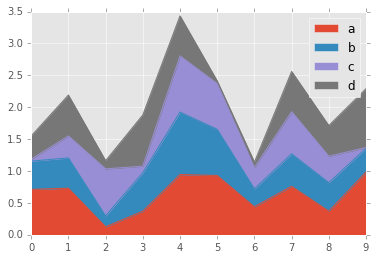

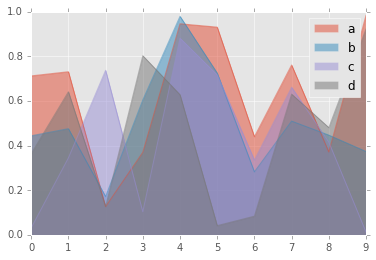

In [54]:
#You can create area plots with Series.plot.area() and DataFrame.plot.area(). 
#Area plots are stacked by default. To produce stacked area plot, 
#each column must be either all positive or all negative values.

#When input data contains NaN, it will be automatically filled by 0. 
#If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()
#-----
df.plot.area(stacked=False);

# Scatter Row-wise

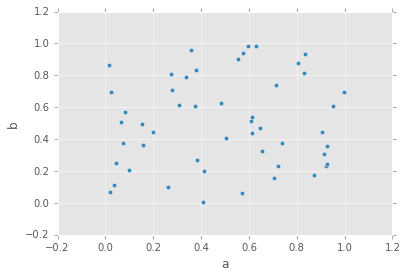

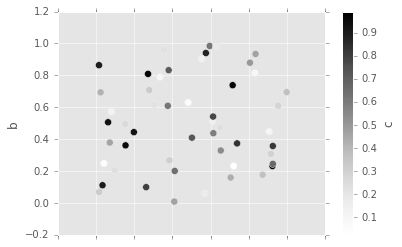

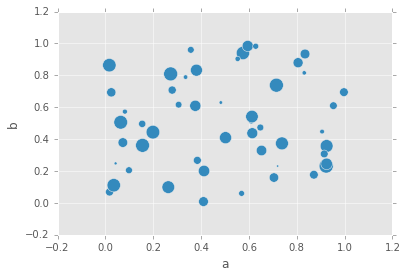

In [57]:
#Scatter plot requires numeric columns for x and y axis
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');
#-----
#The keyword c may be given as the name of a column to provide colors for each point:
df.plot.scatter(x='a', y='b', c='c', s=50);
#-----
df.plot.scatter(x='a', y='b', s=df['c']*200);

# Hexagonal bins row-wise alternative to Scatter..

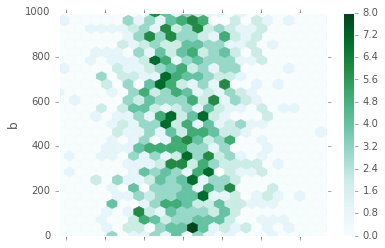

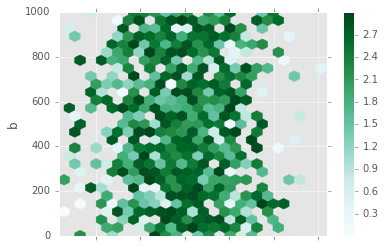

In [59]:
#You can create hexagonal bin plots with DataFrame.plot.hexbin(). 
#Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)
#------
#We can give the values..
#By default, a histogram of the counts around each (x, y) point is computed. 
#You can specify alternative aggregations by passing values to the C and reduce_C_function arguments.
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,gridsize=25)

a    0.883667
b    0.235753
c    0.047684
d    0.732215
Name: series, dtype: float64


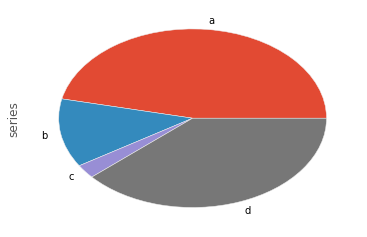

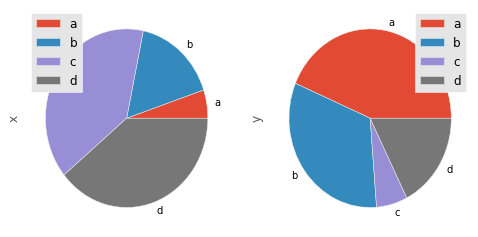

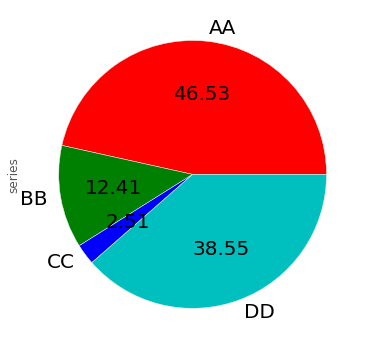

In [66]:
#You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). 
#If your data includes any NaN, they will be automatically filled with 0. 
#A ValueError will be raised if there are any negative values in your data.
series = pd.Series(np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
print series
series.plot.pie()
#------
#Note that pie plot with DataFrame requires that you either specify a target column by the y argument or subplots=True. 
#When y is specified, pie plot of selected column will be drawn. 
#If subplots=True is specified, pie plots for each column are drawn as subplots. 
#A legend will be drawn in each pie plots by default; specify legend=False to hide it.
plt.figure()
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))
#------
plt.figure()
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
    autopct='%.2f', fontsize=20, figsize=(6, 6))

# Plotting Tools
## Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12083ae90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124f05b50>]], dtype=object)

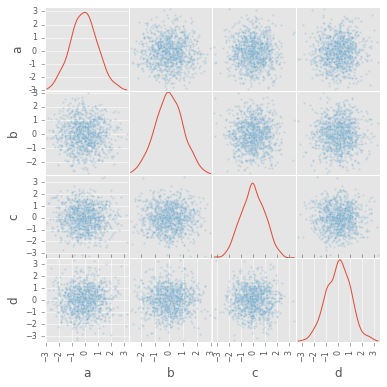

In [68]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

## Density Plot Column-wise..

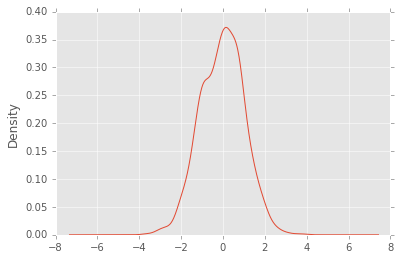

In [71]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

# Iris Data
    SepalLength,SepalWidth,PetalLength,PetalWidth,Name
    5.1,3.5,1.4,0.2,Iris-setosa
    4.9,3.0,1.4,0.2,Iris-setosa
    4.7,3.2,1.3,0.2,Iris-setosa
    4.6,3.1,1.5,0.2,Iris-setosa
    5.0,3.6,1.4,0.2,Iris-setosa

## Andrews Curves - Row-wise Clustering

Each data point defines a finite Fourier series:

Andrews plots represent each observation by a function f(t) of a continuous dummy variable t over the interval [0,1]. f(t) is defined for the i th observation in X as

Andrews curves are a method for visualizing multidimensional data by mapping each observation onto a function. This function is defined as 
f(t)=X1(i,1)/Root2+X2(i,2)sin(2πt)+X3(i,3)cos(2πt)+…

It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together.

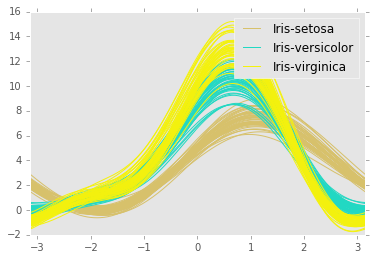

In [76]:
from pandas.tools.plotting import andrews_curves
data = pd.read_csv('data/iris.csv')
plt.figure()
andrews_curves(data, 'Name')
# In the plot below, the each color used represents a class and we can easily note that the lines that represent samples
#from the same class have similar curves.

# Parallel Coordinates Row-wise Clustering
Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.



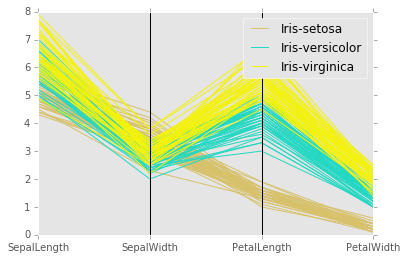

In [77]:
from pandas.tools.plotting import parallel_coordinates
data = pd.read_csv('data/iris.csv')
plt.figure()
parallel_coordinates(data, 'Name')

In [82]:
# Lag Plot and Autocorrelation

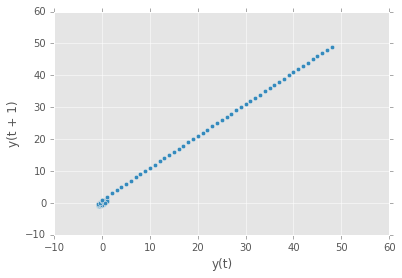

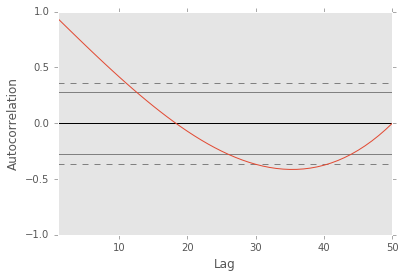

In [85]:
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
plt.figure()
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)
data = pd.Series(range(50))
lag_plot(data)
plt.figure()
autocorrelation_plot(data)

In [103]:
a = np.arange(0,4)
b = np.arange(1,5)
df = pd.DataFrame({"a":a,"b":b})
df.corr()

,a,b
a,1.0,1.0
b,1.0,1.0


# Bootstrap Plot Sample Statistics
Bootstrap plots are used to visually assess the uncertainty of a statistic, such as mean, median, midrange, etc. A random subset of a specified size is selected from a data set, the statistic in question is computed for this subset and the process is repeated a specified number of times. Resulting plots and histograms are what constitutes the bootstrap plot.

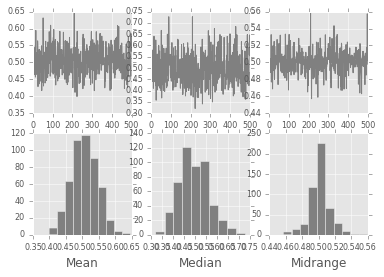

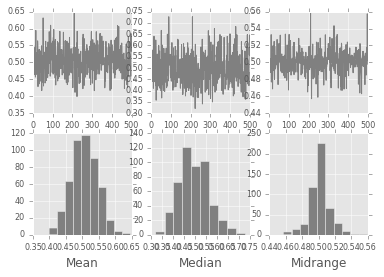

In [106]:
from pandas.tools.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='grey')

# RadViz Row-wise Clustering

RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

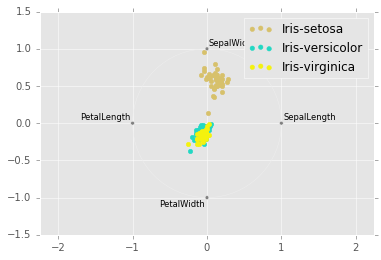

In [108]:
from pandas.tools.plotting import radviz
data = pd.read_csv('data/iris.csv')
plt.figure()
radviz(data, 'Name')

# Colormap 
http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

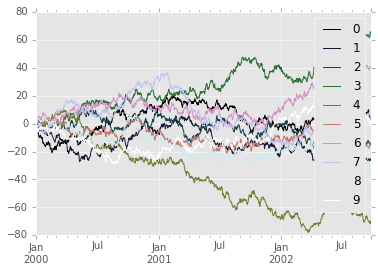

In [128]:
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)
df = df.cumsum()
plt.figure()
df.plot(colormap='cubehelix')

# Seaborn 

## tips.csv Example
    total_bill,tip,sex,smoker,day,time,size
    16.99,1.01,Female,No,Sun,Dinner,2
    10.34,1.66,Male,No,Sun,Dinner,3
    21.01,3.5,Male,No,Sun,Dinner,3
    23.68,3.31,Male,No,Sun,Dinner,2
    24.59,3.61,Female,No,Sun,Dinner,4

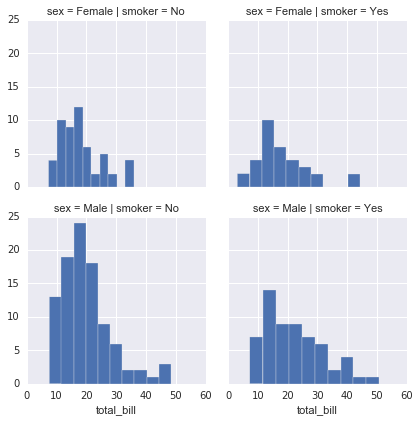

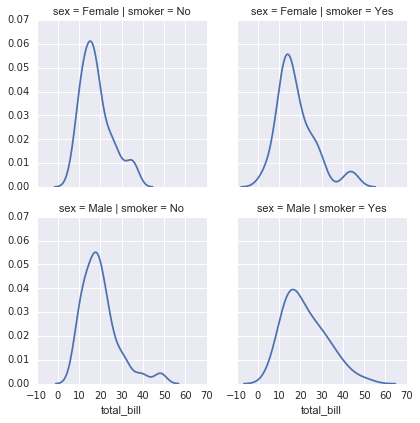

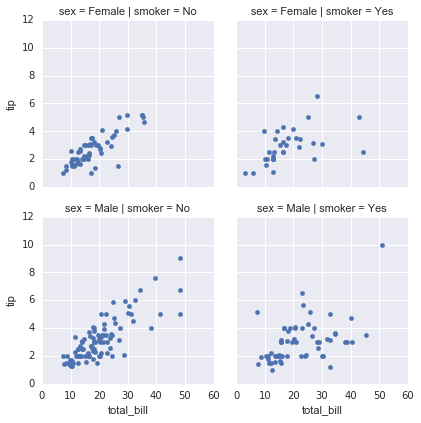

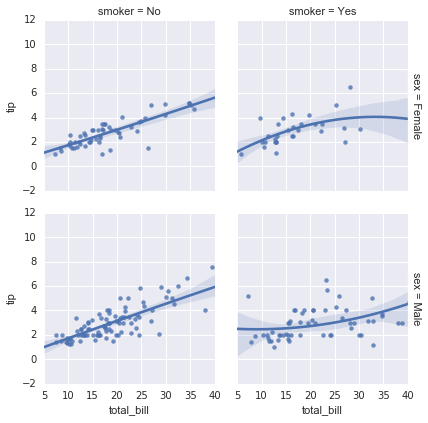

In [140]:
tips_data = pd.read_csv('data/tips.csv')
import seaborn as sns
g = sns.FacetGrid(tips_data, row="sex", col="smoker")
g.map(plt.hist, "total_bill")
#-----
g = sns.FacetGrid(tips_data, row="sex", col="smoker")
g.map(sns.kdeplot, "total_bill")
#-----
g = sns.FacetGrid(tips_data, row="sex", col="smoker")
g.map(plt.scatter, "total_bill", "tip")
#-----
g = sns.FacetGrid(tips_data, row="sex", col="smoker", margin_titles=True)
g.map(sns.regplot, "total_bill", "tip", order=2)
#-----

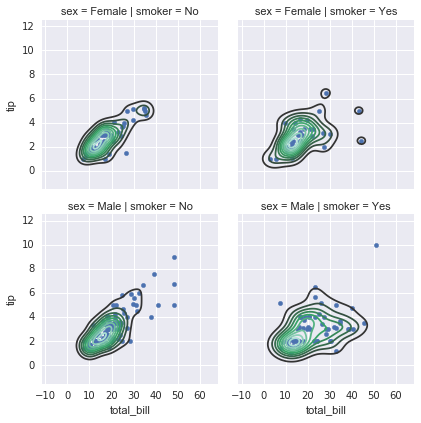

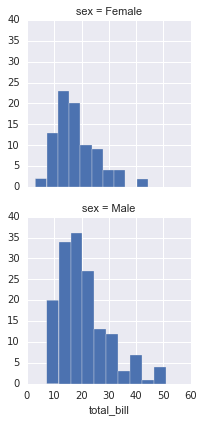

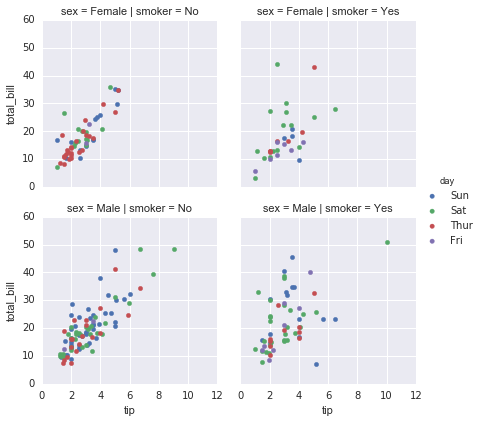

In [143]:
#It didn't fit in..
g = sns.FacetGrid(tips_data, row="sex", col="smoker")
g.map(plt.scatter, "total_bill", "tip")
g.map(sns.kdeplot, "total_bill", "tip")
#----
g = sns.FacetGrid(tips_data, row="sex")
g.map(plt.hist, "total_bill")
#-----
g = sns.FacetGrid(tips_data, row="sex", col="smoker", hue="day")
g.map(plt.scatter, "tip", "total_bill")
g.add_legend()

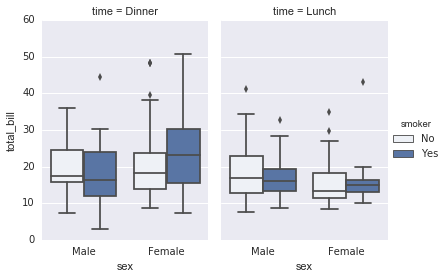

In [145]:
g = sns.FacetGrid(tips_data, col="time", size=4, aspect=.7)
(g.map(sns.boxplot, "sex", "total_bill", "smoker")
  .despine(left=True)
  .add_legend(title="smoker"))
#Draw a box plot on to a FacetGrid to group within an additional categorical variable: